Bestem partielt afledede af udtrykket for $g$ og opstil udtryk for usikkerheden på $g$ vha. ophobningsloven

In [241]:
import sympy as sp
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Udtryk for g for de forskellige former
a, R, r, theta = sp.symbols('a R r theta')

g_solid_kugle = -(a*(1+(2 * R**2 /( 5 * r**2))))/sp.sin(theta)

g_hul_kugle = -(a*(1+(2 * R**2 /( 3 * r**2))))/sp.sin(theta)

g_hul_cylinder = -(a*(1+(R**2 / r**2)))/sp.sin(theta)

# En funktion der returnerer en liste med de partielle afledede af et udtryk for g
def partial_derivatives(expr):
    return [(sp.diff(expr, var), var) for var in [a, R, r, theta]]

# Brug ophobningsloven til at finde udtrykket for usikkerheden på g for et givent udtryk
def ophobningslov(expr, uncertainties):
    partials = partial_derivatives(expr)
    return sp.sqrt(sum([(partials[i][0] * uncertainties[i])**2 for i in range(len(partials))]))



In [259]:
# Filstier
solid_kugle_1_loc = r"C:\Users\marcu\OneDrive\Documents\GitHub\MekRelLab\Lab 11 - skråplan 2\data\solid kugle nr 1.csv"
hul_kugle_loc = r"C:\Users\marcu\OneDrive\Documents\GitHub\MekRelLab\Lab 11 - skråplan 2\data\hul kugle nr 1.csv"
hul_cylinder_loc = r"C:\Users\marcu\OneDrive\Documents\GitHub\MekRelLab\Lab 11 - skråplan 2\data\cylinder nr 1.csv"

# Indlæs data fra csv-fil
solid_kugle_1 = np.genfromtxt(solid_kugle_1_loc, delimiter=",", skip_header=1)
solid_kugle_t_arr = solid_kugle_1[:, 0]
solid_kugle_v_arr = solid_kugle_1[:, 1]

hul_kugle = np.genfromtxt(hul_kugle_loc, delimiter=",", skip_header=1)
hul_kugle_t_arr = hul_kugle[:, 0]
hul_kugle_v_arr = hul_kugle[:, 1]

hul_cylinder = np.genfromtxt(hul_cylinder_loc, delimiter=",", skip_header=1)
hul_cylinder_t_arr = hul_cylinder[:, 0]
hul_cylinder_v_arr = hul_cylinder[:, 1]

# Returnerer tiderne knyttet til de første punkter over en given voltgrænse
def find_peaks(time_arr, voltage_arr, V_limit):
    peaks = []
    # For hvert peak finder vi det første punkt over en voltgrænse
    for i in range(len(voltage_arr)):
        # Tjek om punktet er over grænsen
        if voltage_arr[i] > V_limit:
            # Hvis det forrige punkt er under grænsen i det første punkt over grænsen for et givent peak
            if voltage_arr[i - 1] < V_limit:
                peaks.append(time_arr[i])

    return peaks

# Find tiderne for de forskellige kugler
peaks_solid_kugle = find_peaks(solid_kugle_t_arr, solid_kugle_v_arr, 3)
peaks_hul_kugle = find_peaks(hul_kugle_t_arr, hul_kugle_v_arr, 3)
peaks_hul_cylinder = find_peaks(hul_cylinder_t_arr, hul_cylinder_v_arr, 3)

print(peaks_solid_kugle)

# # Træk den første tid fra de andre og fjern den fra listen for at få en liste med tidspunkterne for gates 2-5
# for i in range(1, len(peaks_solid_kugle)):
#     peaks_solid_kugle[i] -= peaks_solid_kugle[0]
#     peaks_hul_kugle[i] -= peaks_hul_kugle[0]
#     peaks_hul_cylinder[i] -= peaks_hul_cylinder[0]

print(peaks_solid_kugle)



[0.001291566265060218, 0.2397915662650603, 0.4172915662650603, 0.5532915662650603, 0.6797915662650602]
[0.001291566265060218, 0.2397915662650603, 0.4172915662650603, 0.5532915662650603, 0.6797915662650602]


In [243]:
# Variable og usikkerheder
# Acceleration
a_solid_kugle = 0 # Skal tages fra fit til stedfunktion
a_u_solid_kugle = 1 # Skal tages fra fit til stedfunktion

a_hul_kugle = 0 # Skal tages fra fit til stedfunktion
a_u_hul_kugle = 1 # Skal tages fra fit til stedfunktion

a_hul_cylinder = 0 # Skal tages fra fit til stedfunktion
a_u_hul_cylinder = 1 # Skal tages fra fit til stedfunktion

# Tid
t_u = 0.00025 # Sekunder

# Radius
R_u = 0.05 * 10**(-3) # Meter

R_solid_kugle = 5.10 * 10**(-3) # Meter

R_hul_kugle = 5.05 * 10**(-3) # Meter

R_hul_cylinder = 16.0 * 10**(-3) # Meter

# Omdrejningsradius
r_u = 0.05 * 10**(-3) # Meter

r_solid_kugle = 5.025 * 10**(-3) # Meter

r_hul_kugle = 4.80 * 10**(-3) # Meter

r_hul_cylinder = 16.0 * 10**(-3) # Meter

# Afstand
d_u = 0.5 * 10**(-2) # Meter
dist_fotogates = [0.166, 0.176, 0.165, 0.177] # Meter

d = np.sum(dist_fotogates)/1 # Meter

# Vinklen mellem bunden af skråplanet og væggen bestemt ved A/B
A = 89.7 #cm
B = 22.1 #cm

# Her bruges ophobningsloven til at finde usikkerheden på vinklen ud fra usikkerheden på længdemålingerne
vinkel_u = np.sqrt(((B/(A**2 + B**2)) * d_u)**2 + ((-A/(A**2 + B**2)) * d_u)**2) # Radianer
vinkel = np.arctan(A/B) # Radianer

g_u_solid_kugle = ophobningslov(g_solid_kugle, [a_u_solid_kugle, R_u, r_u, vinkel_u])
g_u_hul_kugle = ophobningslov(g_hul_kugle, [a_u_hul_kugle, R_u, r_u, vinkel_u])
g_u_hul_cylinder = ophobningslov(g_hul_cylinder, [a_u_hul_cylinder, R_u, r_u, vinkel_u])

# Beregn usikkerhederne på g for de forskellige former
g_u_solid_kugle_sub = g_u_solid_kugle.subs({a: a_solid_kugle, r: r_solid_kugle, R: R_solid_kugle, theta: vinkel})
g_u_hul_kugle_sub = g_u_hul_kugle.subs({a: a_hul_kugle, r: r_hul_kugle, R: R_hul_kugle, theta: vinkel})
g_u_hul_cylinder_sub = g_hul_cylinder.subs({a: a_hul_cylinder, r: r_hul_cylinder, R: R_hul_cylinder, theta: vinkel})

vinkel_u



5.41228880561763e-05

parametre fra fittet [ 1.41773904e+00  5.25348725e-01 -6.92173298e-04]
-2.06175301328048


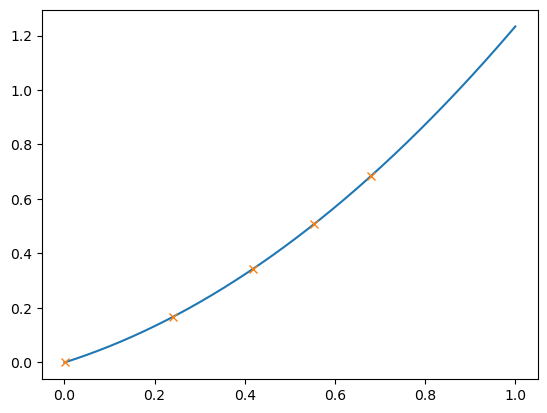

In [274]:
# Lav fits til en stedfunktion med tiderne fra forsøgene

# Funktionen der skal fittes
def stedfunk(t, a, v_0, s_0):
    s = a/2 * t**2 + v_0 * t + s_0
    return s
    
# Afstanden til de forskellige tidspunkter er præfikssummen af afstanden mellem fotogatesne
fit_dist = np.cumsum(dist_fotogates)
fit_dist = np.insert(fit_dist, 0, 0)

# Usikkerheder på tid og længde som array (til curve_fit)
t_u_arr = np.full(len(fit_dist), t_u)
d_u_arr = np.full(len(fit_dist), d_u)

# Solid kugle

# Fit til stedfunktion med v_0 som fri parameter
param1_solid_kugle, cov1_solid_kugle = curve_fit(stedfunk, peaks_solid_kugle, fit_dist, p0=[0, 0, 0], sigma=t_u_arr, absolute_sigma=True)

# Plot fit 
X = np.linspace(0, 1, 1000)
Y = stedfunk(X, *param1_solid_kugle)

plt.plot(X, Y, label="Fit til stedfunktion")
plt.plot(peaks_solid_kugle, fit_dist, "x", label="Data")

print("parametre fra fittet", param1_solid_kugle)

print(g_solid_kugle.subs({a: param1_solid_kugle[0], r: r_solid_kugle, R: R_solid_kugle, theta: vinkel}))


a